In [1]:
import pandas as pd
import xgboost as xgb
import numpy as np
import collections
import witwidget
import os, glob


from matplotlib import pyplot
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot


from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
 
    
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils import shuffle
from witwidget.notebook.visualization import WitWidget, WitConfigBuilder

/Users/marami3/anaconda3/lib/python3.7/site-packages/dask/dataframe/utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Set column dtypes for Pandas
from datetime import datetime
dt = datetime.utcnow()
COLUMN_NAMES = collections.OrderedDict({
  'Gmt time': object,
  'Open': np.float64,
  'High': np.float64,
  'Low': np.float64,
  'Close': np.float64,
  'Volume': np.float64,
  'Open_Bid': np.float64,
  'High_Bid': np.float64,
  'Low_Bid': np.float64,
  'Close_Bid': np.float64,
  'Volume_Bid': np.float64,
  'Spread': np.float64,
  'day_name': object,
  'weekday': 'category',#'category'np.int64
  'Pct_Range_Close': np.float64,
  'Pct_Range_Close_diff': np.float64,
  'MA_Close_5': np.float64,
  'MA_Close_25': np.float64,
  'MA_Close_50': np.float64,
  'MA_Close_200': np.float64,
  'EMA_Close_5': np.float64,
  'Momentum_1': np.float64,
  'Momentum_2': np.float64,
  'Momentum_5': np.float64,
  'Momentum_24': np.float64,
  'rsi': np.float64,
  'Rolling_Mean25': np.float64,
  'Bollinger_High': np.float64,
  'Bollinger_Low': np.float64,
  'PP': np.float64,
  'R1': np.float64,
  'S1': np.float64,
  'R2': np.float64,
  'S2': np.float64,
  'R3': np.float64,
  'S3': np.float64,
  'SO%k': np.float64,
  'SO%k1': np.float64,
  'SO%d2': np.float64,
  'Trix_5': np.float64,
  'MACD_5_25': np.float64,
  'MACDsign_5_25': np.float64,
  'MACDdiff_5_25': np.float64,
  'Mass_Index_25_8_9': np.float64,
  'Class': np.float64
})

In [3]:
pwd = os.getcwd()
datasource_path = os.path.join(pwd, r'../../../Datasets/Junio2020/procesados_classification/')
filenames = glob.glob(datasource_path + "/*.csv")
filenames.sort()
for file in filenames:
    print(filenames.index(file), ' ',os.path.basename(file))

0   3C-EURUSD_FULL_1D_145F.csv
1   3C-EURUSD_FULL_1D_21F.csv
2   3C-EURUSD_FULL_1D_45F.csv
3   3C-EURUSD_FULL_1D_70F.csv
4   3C-EURUSD_FULL_1H_45F.csv
5   5C-EURUSD_FULL_1D_21F.csv
6   5C-EURUSD_FULL_1D_45F.csv
7   C-EURUSD_FULL_1D_21F.csv
8   C-EURUSD_FULL_1H_25F.csv
9   C-EURUSD_FULL_1H_45F.csv
10   C-EURUSD_FULL_1H_54F.csv


In [4]:
#SELECT an INDEX 
INDX = 0

CLASS_NUMBER = '3C'
MODEL_TYPE = 'XGBOOST'
FRECUENCIA = '1D'
TARGET_NAME = "Class"
ID = '01'

PROFUNDIDAD = 0

TEST_SIZE = .20
VAL_SIZE = .10

In [5]:
# Load data into Pandas
data = pd.read_csv(filenames[INDX], 
  index_col=False,
  dtype=COLUMN_NAMES
)
data = data.dropna()

#data = shuffle(data, random_state=2)
data.head()

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,...,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr,Class
0,2004-01-01,1.25950,1.26052,1.24698,1.25733,4.621817e+05,1.25934,1.26035,1.24679,1.25723,...,76.440177,76.440177,-23.559823,0.0,1.257330,0.0,-0.522913,0.000000,0.000000,0.0
1,2004-01-02,1.25717,1.26282,1.25214,1.25832,1.066578e+06,1.25701,1.26263,1.25198,1.25806,...,71.590909,74.015543,-28.409091,0.0,1.257865,0.0,0.078738,0.078707,0.078738,1.0
2,2004-01-04,1.25925,1.26487,1.25789,1.26318,6.879980e+04,1.25855,1.26477,1.25779,1.26308,...,90.553382,79.528156,-9.446618,0.0,1.260854,0.0,0.386229,0.385485,0.465272,1.0
3,2004-01-05,1.26324,1.26935,1.26301,1.26830,1.119689e+06,1.26308,1.26924,1.26288,1.26820,...,95.306214,85.816835,-4.693786,0.0,1.265002,0.0,0.405326,0.404507,0.872484,1.0
4,2004-01-06,1.26836,1.28093,1.26666,1.27150,1.125442e+06,1.26820,1.28083,1.26650,1.27140,...,72.223859,86.027818,-27.776141,0.0,1.268630,0.0,0.252306,0.251988,1.126991,-1.0


In [6]:
data.columns

Index(['Gmt time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Open_Bid',
       'High_Bid', 'Low_Bid', 'Close_Bid',
       ...
       'momentum_stoch', 'momentum_stoch_signal', 'momentum_wr', 'momentum_ao',
       'momentum_kama', 'momentum_roc', 'others_dr', 'others_dlr', 'others_cr',
       'Class'],
      dtype='object', length=145)

In [7]:
data = data.drop(['Gmt time'], axis = 1)
data = data.drop(['day_name'], axis = 1)
data = data.drop(['weekday'], axis = 1)
data = data.drop(['Open_Bid'], axis = 1)
data = data.drop(['High_Bid'], axis = 1)
data = data.drop(['Low_Bid'], axis = 1)
data = data.drop(['Close_Bid'], axis = 1)



data = data.drop(['EMA_Close_5'], axis = 1)

data.head()

,Open,High,Low,Close,Volume,Volume_Bid,Spread,Pct_Range_Close,Pct_Range_Close_diff,AQV,...,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr,Class
0,1.25950,1.26052,1.24698,1.25733,4.621817e+05,5.597896e+05,0.00010,0.000000,0.000000,4.621817e+05,...,76.440177,76.440177,-23.559823,0.0,1.257330,0.0,-0.522913,0.000000,0.000000,0.0
1,1.25717,1.26282,1.25214,1.25832,1.066578e+06,1.277971e+06,0.00026,0.000787,0.000787,1.528760e+06,...,71.590909,74.015543,-28.409091,0.0,1.257865,0.0,0.078738,0.078707,0.078738,1.0
2,1.25925,1.26487,1.25789,1.26318,6.879980e+04,8.372040e+04,0.00010,0.003862,0.003075,1.597559e+06,...,90.553382,79.528156,-9.446618,0.0,1.260854,0.0,0.386229,0.385485,0.465272,1.0
3,1.26324,1.26935,1.26301,1.26830,1.119689e+06,1.353480e+06,0.00010,0.004053,0.000191,2.717248e+06,...,95.306214,85.816835,-4.693786,0.0,1.265002,0.0,0.405326,0.404507,0.872484,1.0
4,1.26836,1.28093,1.26666,1.27150,1.125442e+06,1.354807e+06,0.00010,0.002523,-0.001530,3.842691e+06,...,72.223859,86.027818,-27.776141,0.0,1.268630,0.0,0.252306,0.251988,1.126991,-1.0


In [8]:
SIZE = data.shape[0]
NUM_FEATURES = data.shape[1]
print(SIZE)
print(NUM_FEATURES)

5137
137


In [9]:
#LOCATION TO SAVE
pwd = os.getcwd()
source_data_toSave = os.path.join(pwd, r'../../../Models/2020/XGBoost/')
#print('Location to Save: ', source_data)
FILENAME = CLASS_NUMBER + '_' + FRECUENCIA + '_' + str(NUM_FEATURES) + 'F_' + str(SIZE) + 'Size_' + MODEL_TYPE +  '_' + TARGET_NAME + "_"+ ID 
file_name_toSave = FILENAME + '.bst'
print('FILENAME: ', FILENAME)
print('File Name Model:', file_name_toSave)

FILENAME:  3C_1D_137F_5137Size_XGBOOST_Class_01
File Name Model: 3C_1D_137F_5137Size_XGBOOST_Class_01.bst


In [10]:
train_dataset_results_csv = os.path.join(pwd, r'../../../Results/XGBoost/' + FILENAME + '_Train.csv')
print(train_dataset_results_csv)

/Users/marami3/Documents/ITESO/IDI4/forex_prediction/Jupyter Notebooks/IDI4/models_clasification/../../../Results/XGBoost/3C_1D_137F_5137Size_XGBOOST_Class_01_Train.csv


In [11]:
test_dataset_results_csv = os.path.join(pwd, r'../../../Results/XGBoost/' + FILENAME + '_Test.csv')
print(test_dataset_results_csv)

/Users/marami3/Documents/ITESO/IDI4/forex_prediction/Jupyter Notebooks/IDI4/models_clasification/../../../Results/XGBoost/3C_1D_137F_5137Size_XGBOOST_Class_01_Test.csv


In [12]:
# Label preprocessing
labels = data['Class'].values

# See the distribution of approved / denied classes (0: denied, 1: approved)
print(data['Class'].value_counts())

 1.0    1729
 0.0    1716
-1.0    1692
Name: Class, dtype: int64


In [13]:
data = data.drop(columns=['Class'])

In [14]:
def get_2Dimension(df, RANGE):
    new_df = pd.DataFrame()
    for i in range(RANGE):
#        new_df = df
        for j in range (df.shape[1]):
            #value = df.iloc[i+1,j]
            #print(value)
            new_col_name = df.columns[j] + '_' + str(i+1)
            #print(new_col_name)
            new_df[new_col_name] = df.iloc[i+1:,j]
            #print(new_df[new_col_name].isnull().sum())
            new_df.fillna(method='backfill', inplace=True)
            #print(new_df[new_col_name].isnull().sum())
    print(new_df.columns)
    return new_df

 


In [15]:
data

,Open,High,Low,Close,Volume,Volume_Bid,Spread,Pct_Range_Close,Pct_Range_Close_diff,AQV,...,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr
0,1.25950,1.26052,1.24698,1.25733,4.621817e+05,5.597896e+05,0.00010,0.000000,0.000000,4.621817e+05,...,0.000000,76.440177,76.440177,-23.559823,0.000000,1.257330,0.000000,-0.522913,0.000000,0.000000
1,1.25717,1.26282,1.25214,1.25832,1.066578e+06,1.277971e+06,0.00026,0.000787,0.000787,1.528760e+06,...,25.516102,71.590909,74.015543,-28.409091,0.000000,1.257865,0.000000,0.078738,0.078707,0.078738
2,1.25925,1.26487,1.25789,1.26318,6.879980e+04,8.372040e+04,0.00010,0.003862,0.003075,1.597559e+06,...,36.762821,90.553382,79.528156,-9.446618,0.000000,1.260854,0.000000,0.386229,0.385485,0.465272
3,1.26324,1.26935,1.26301,1.26830,1.119689e+06,1.353480e+06,0.00010,0.004053,0.000191,2.717248e+06,...,44.645711,95.306214,85.816835,-4.693786,0.000000,1.265002,0.000000,0.405326,0.404507,0.872484
4,1.26836,1.28093,1.26666,1.27150,1.125442e+06,1.354807e+06,0.00010,0.002523,-0.001530,3.842691e+06,...,41.690793,72.223859,86.027818,-27.776141,0.000000,1.268630,0.000000,0.252306,0.251988,1.126991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5132,1.09019,1.09960,1.08970,1.09787,2.219154e+05,2.075363e+05,0.00003,0.007045,0.007631,2.134402e+09,...,53.470734,87.194861,66.181299,-12.805139,0.005839,1.090343,1.224426,0.704464,0.701995,-12.682430
5133,1.09788,1.10311,1.09342,1.10169,3.392159e+05,3.194905e+05,0.00003,0.003479,-0.003565,2.134742e+09,...,60.537067,94.453125,78.650685,-5.546875,0.005649,1.092116,1.806605,0.347946,0.347343,-12.378612
5134,1.10168,1.10937,1.09919,1.10782,2.907155e+05,2.312052e+05,0.00003,0.005564,0.002085,2.135032e+09,...,63.147537,95.134965,92.260984,-4.865035,0.007610,1.095113,2.515176,0.556418,0.554876,-11.891071
5135,1.10780,1.11452,1.10702,1.11071,3.306924e+05,3.730174e+05,0.00035,0.002609,-0.002955,2.135363e+09,...,66.774381,89.705485,93.097858,-10.294515,0.011013,1.097529,2.655317,0.260873,0.260533,-11.661219


In [16]:
pd_old_rows = get_2Dimension(data,PROFUNDIDAD)

Index([], dtype='object')


In [17]:
pd_old_rows.shape

(0, 0)

In [18]:
data = pd.concat([data, pd_old_rows], axis=1, sort=False)
data.fillna(method='backfill', inplace=True)
data.shape

(5137, 136)

In [19]:
data.head(30)

,Open,High,Low,Close,Volume,Volume_Bid,Spread,Pct_Range_Close,Pct_Range_Close_diff,AQV,...,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr
0,1.25950,1.26052,1.24698,1.25733,4.621817e+05,5.597896e+05,0.00010,0.000000,0.000000,4.621817e+05,...,0.000000,76.440177,76.440177,-23.559823,0.000000,1.257330,0.000000,-0.522913,0.000000,0.000000
1,1.25717,1.26282,1.25214,1.25832,1.066578e+06,1.277971e+06,0.00026,0.000787,0.000787,1.528760e+06,...,25.516102,71.590909,74.015543,-28.409091,0.000000,1.257865,0.000000,0.078738,0.078707,0.078738
2,1.25925,1.26487,1.25789,1.26318,6.879980e+04,8.372040e+04,0.00010,0.003862,0.003075,1.597559e+06,...,36.762821,90.553382,79.528156,-9.446618,0.000000,1.260854,0.000000,0.386229,0.385485,0.465272
3,1.26324,1.26935,1.26301,1.26830,1.119689e+06,1.353480e+06,0.00010,0.004053,0.000191,2.717248e+06,...,44.645711,95.306214,85.816835,-4.693786,0.000000,1.265002,0.000000,0.405326,0.404507,0.872484
4,1.26836,1.28093,1.26666,1.27150,1.125442e+06,1.354807e+06,0.00010,0.002523,-0.001530,3.842691e+06,...,41.690793,72.223859,86.027818,-27.776141,0.000000,1.268630,0.000000,0.252306,0.251988,1.126991
5,1.27161,1.27417,1.26180,1.26377,1.111343e+06,1.345833e+06,0.00010,-0.006079,-0.008602,4.954033e+06,...,36.724836,49.455081,72.328384,-50.544919,0.001936,1.266511,0.000000,-0.607943,-0.609799,0.512196
6,1.26369,1.27854,1.25590,1.27696,1.115933e+06,1.348588e+06,0.00010,0.010437,0.016516,6.069966e+06,...,51.405206,88.306333,69.995091,-11.693667,0.003342,1.270900,0.000000,1.043703,1.038294,1.561245
7,1.27698,1.28676,1.27034,1.28149,1.066698e+06,1.274568e+06,0.00026,0.003547,-0.006890,7.136664e+06,...,58.689798,86.752137,74.837850,-13.247863,0.004954,1.275085,0.000000,0.354749,0.354121,1.921532
8,1.28279,1.28572,1.28253,1.28477,7.567420e+04,8.780950e+04,0.00010,0.002560,-0.000988,7.212338e+06,...,59.848956,94.997486,90.018652,-5.002514,0.006506,1.278809,0.000000,0.255952,0.255625,2.182402
9,1.28498,1.28971,1.27327,1.27390,1.110720e+06,1.341147e+06,0.00010,-0.008461,-0.011020,8.323059e+06,...,50.366111,63.000234,81.583286,-36.999766,0.006679,1.277300,0.000000,-0.846066,-0.849665,1.317872


In [20]:
# Convert categorical columns to dummy columns
dummy_columns = list(data.dtypes[data.dtypes == 'category'].index)
data = pd.get_dummies(data, columns=dummy_columns)

In [21]:
# Preview the data
data.head()

,Open,High,Low,Close,Volume,Volume_Bid,Spread,Pct_Range_Close,Pct_Range_Close_diff,AQV,...,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr
0,1.25950,1.26052,1.24698,1.25733,4.621817e+05,5.597896e+05,0.00010,0.000000,0.000000,4.621817e+05,...,0.000000,76.440177,76.440177,-23.559823,0.0,1.257330,0.0,-0.522913,0.000000,0.000000
1,1.25717,1.26282,1.25214,1.25832,1.066578e+06,1.277971e+06,0.00026,0.000787,0.000787,1.528760e+06,...,25.516102,71.590909,74.015543,-28.409091,0.0,1.257865,0.0,0.078738,0.078707,0.078738
2,1.25925,1.26487,1.25789,1.26318,6.879980e+04,8.372040e+04,0.00010,0.003862,0.003075,1.597559e+06,...,36.762821,90.553382,79.528156,-9.446618,0.0,1.260854,0.0,0.386229,0.385485,0.465272
3,1.26324,1.26935,1.26301,1.26830,1.119689e+06,1.353480e+06,0.00010,0.004053,0.000191,2.717248e+06,...,44.645711,95.306214,85.816835,-4.693786,0.0,1.265002,0.0,0.405326,0.404507,0.872484
4,1.26836,1.28093,1.26666,1.27150,1.125442e+06,1.354807e+06,0.00010,0.002523,-0.001530,3.842691e+06,...,41.690793,72.223859,86.027818,-27.776141,0.0,1.268630,0.0,0.252306,0.251988,1.126991


In [22]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Volume_Bid', 'Spread',
       'Pct_Range_Close', 'Pct_Range_Close_diff', 'AQV',
       ...
       'momentum_uo', 'momentum_stoch', 'momentum_stoch_signal', 'momentum_wr',
       'momentum_ao', 'momentum_kama', 'momentum_roc', 'others_dr',
       'others_dlr', 'others_cr'],
      dtype='object', length=136)

In [23]:
# Split the data into train / test sets
x,y = data,labels
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42, shuffle=False)

In [24]:
print(x_train.shape)
print(x_train)

(3852, 136)
         Open     High      Low    Close        Volume    Volume_Bid   Spread  \
0     1.25950  1.26052  1.24698  1.25733  4.621817e+05  5.597896e+05  0.00010   
1     1.25717  1.26282  1.25214  1.25832  1.066578e+06  1.277971e+06  0.00026   
2     1.25925  1.26487  1.25789  1.26318  6.879980e+04  8.372040e+04  0.00010   
3     1.26324  1.26935  1.26301  1.26830  1.119689e+06  1.353480e+06  0.00010   
4     1.26836  1.28093  1.26666  1.27150  1.125442e+06  1.354807e+06  0.00010   
...       ...      ...      ...      ...           ...           ...      ...   
3847  1.13053  1.13060  1.12895  1.12980  1.312599e+04  1.345213e+04  0.00005   
3848  1.12981  1.13324  1.12740  1.13080  2.039102e+05  2.052651e+05  0.00003   
3849  1.13080  1.13847  1.13037  1.13586  2.240877e+05  2.239425e+05  0.00003   
3850  1.13587  1.13877  1.12907  1.13027  2.463617e+05  2.469671e+05  0.00005   
3851  1.13027  1.13985  1.12701  1.12905  2.545137e+05  2.624755e+05  0.00003   

      Pct_Range

In [35]:
print(x_test.shape)
x_test.reset_index(drop=True, inplace=True)
print(x_test)

(1285, 136)
         Open     High      Low    Close       Volume   Volume_Bid   Spread  \
0     1.12906  1.13088  1.12184  1.12266  243856.6875  234473.6250  0.00039   
1     1.12200  1.12347  1.12200  1.12318   14648.8096   16429.1602  0.00006   
2     1.12317  1.12783  1.12240  1.12667  224107.7344  234944.9063  0.00003   
3     1.12668  1.13398  1.12566  1.12963  242734.0313  256540.1563  0.00004   
4     1.12963  1.13618  1.12718  1.13267  266588.8750  273769.6250  0.00003   
...       ...      ...      ...      ...          ...          ...      ...   
1280  1.09019  1.09960  1.08970  1.09787  221915.4388  207536.2810  0.00003   
1281  1.09788  1.10311  1.09342  1.10169  339215.8879  319490.5464  0.00003   
1282  1.10168  1.10937  1.09919  1.10782  290715.4826  231205.2051  0.00003   
1283  1.10780  1.11452  1.10702  1.11071  330692.3901  373017.4493  0.00035   
1284  1.11213  1.11217  1.11028  1.11158   10126.4174    9217.4834  0.00002   

      Pct_Range_Close  Pct_Range_Close_

In [36]:
print(y_test.shape)
print(y_test)

(1285,)
[0. 1. 1. ... 1. 0. 0.]


In [26]:
# Train the model, this will take a few minutes to run
bst = xgb.XGBClassifier(
    objective='reg:logistic'
)

bst.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
# Save the model so we can deploy it
#bst.save_model(source_data_toSave + file_name_toSave)

In [28]:
#bst_loaded = xgb.Booster({'nthread': 4})  # init model
#bst_loaded.load_model(source_data_toSave + file_name_toSave)  # load data

In [29]:
# Get predictions on the test set and print the accuracy score
y_pred = bst.predict(x_test)
acc = accuracy_score(y_test, y_pred.round())
print(acc, '\n')

0.43735408560311284 



In [30]:
# Print a confusion matrix
print('Confusion matrix:')
cm = confusion_matrix(y_test, y_pred.round())
cm = cm / cm.astype(np.float).sum(axis=1)
print(cm)

Confusion matrix:
[[0.18814433 0.31861804 0.3962766 ]
 [0.17783505 0.62380038 0.33776596]
 [0.19072165 0.26487524 0.43617021]]


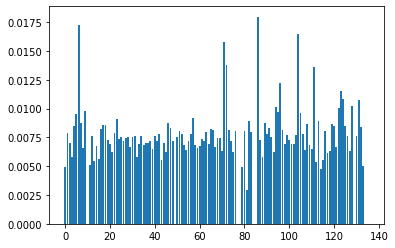

In [31]:

#print(bst.feature_importances_)
pyplot.bar(range(len(bst.feature_importances_)), bst.feature_importances_)
pyplot.show()

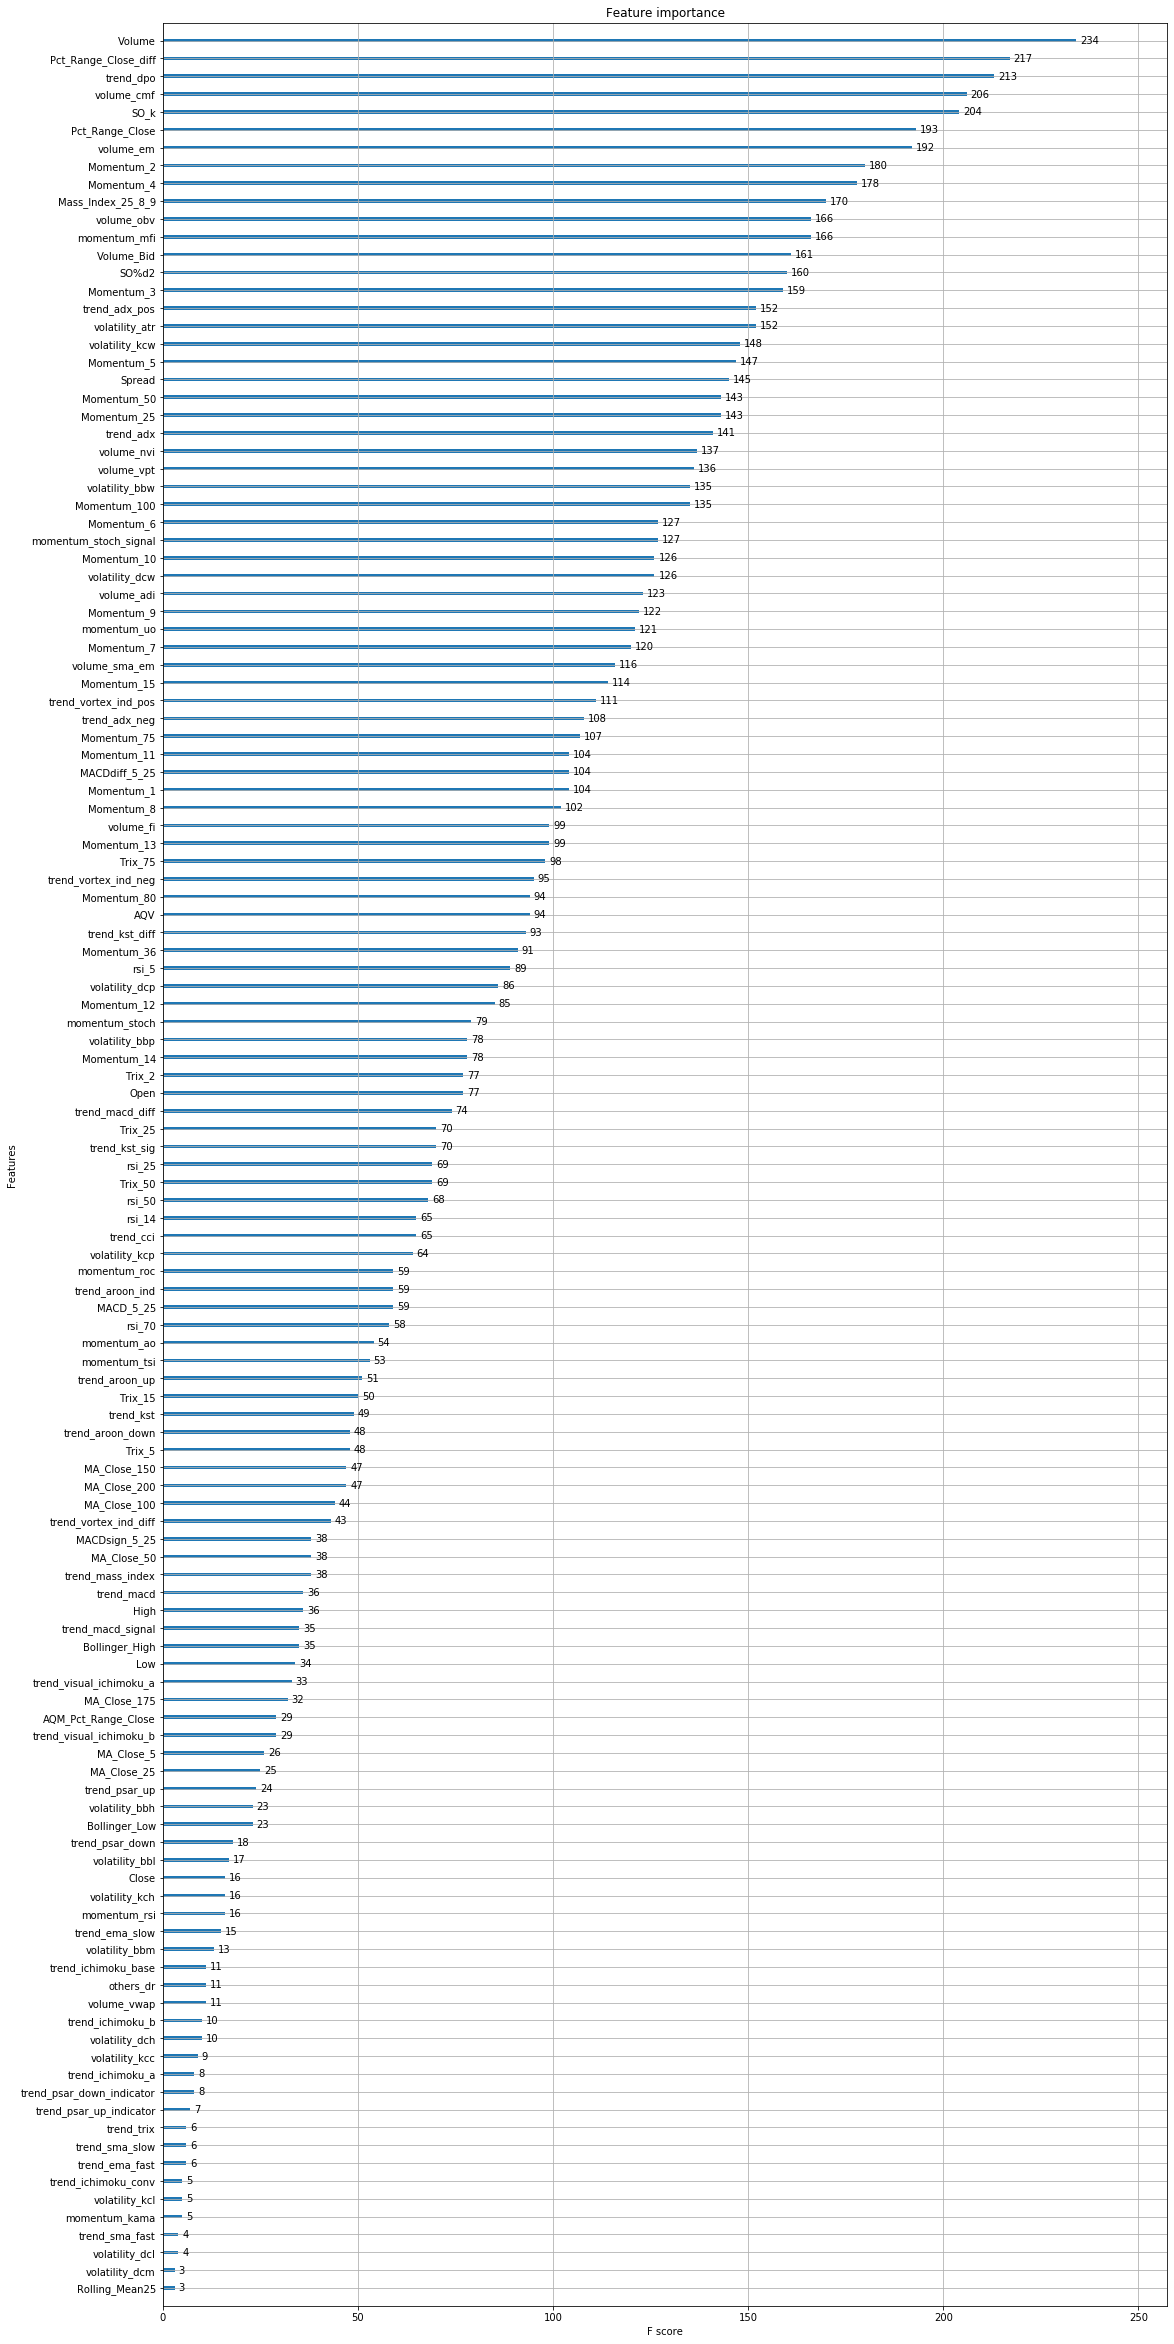

In [32]:
# plot feature importance
ax = plot_importance(bst)
fig = ax.figure
fig.set_size_inches(18, 42)
pyplot.show()

In [227]:
# define custom class to fix bug in xgboost 1.0.2
class MyXGBClassifier(XGBClassifier):
    @property
    def coef_(self):
        return None
 
# split data into X and y
x,y = data,labels
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42,shuffle=False)

# fit model on all training data
model = MyXGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data and evaluate
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    predictions = selection_model.predict(select_X_test)
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

KeyboardInterrupt: 

### Predict Train Dataset

In [37]:
y_train_pred = bst.predict(x_train)
#x_train,x_test,y_train,y_test

In [38]:
y_train_real = pd.DataFrame({'Real_Class': y_train})
y_train_pred_pd = pd.DataFrame({'Predicted_Class': y_train_pred})
print('y_train_real ',y_train_real.shape)
print('y_train_pred_pd ',y_train_pred_pd.shape)
x_train_real = pd.concat([x_train,y_train_real], axis=1, sort=False)
print('x_train_real ',x_train_real.shape)
x_train = pd.concat([x_train_real,y_train_pred_pd], axis=1, sort=False)
print('x_train ', x_train.shape)

y_train_real  (3852, 1)
y_train_pred_pd  (3852, 1)
x_train_real  (3852, 137)
x_train  (3852, 138)


In [40]:
#Save
x_train.to_csv(train_dataset_results_csv, header=True, index=False)
print(train_dataset_results_csv)

/Users/marami3/Documents/ITESO/IDI4/forex_prediction/Jupyter Notebooks/IDI4/models_clasification/../../../Results/XGBoost/3C_1D_137F_5137Size_XGBOOST_Class_01_Train.csv


### Predict Test Dataset

In [41]:
x_test.shape
x_test

,Open,High,Low,Close,Volume,Volume_Bid,Spread,Pct_Range_Close,Pct_Range_Close_diff,AQV,...,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr
0,1.12906,1.13088,1.12184,1.12266,243856.6875,234473.6250,0.00039,-0.005660,-0.004580,1.820627e+09,...,35.351948,3.325223,19.153738,-96.674777,0.002120,1.131513,-1.518461,-0.565963,-0.567570,-10.710792
1,1.12200,1.12347,1.12200,1.12318,14648.8096,16429.1602,0.00006,0.000463,0.006123,1.820641e+09,...,34.811983,5.433901,11.061761,-94.566099,0.000224,1.130624,-1.522086,0.046319,0.046308,-10.669434
2,1.12317,1.12783,1.12240,1.12667,224107.7344,234944.9063,0.00003,0.003107,0.002644,1.820865e+09,...,37.086445,19.586375,9.448500,-80.413625,-0.001933,1.130593,-1.261108,0.310725,0.310243,-10.391862
3,1.12668,1.13398,1.12566,1.12963,242734.0313,256540.1563,0.00004,0.002627,-0.000480,1.821108e+09,...,37.094181,31.589619,18.869965,-68.410381,-0.002824,1.130577,-0.765149,0.262721,0.262377,-10.156443
4,1.12963,1.13618,1.12718,1.13267,266588.8750,273769.6250,0.00003,0.002691,0.000064,1.821375e+09,...,37.108074,43.917275,31.697756,-56.082725,-0.003233,1.130621,0.429143,0.269115,0.268753,-9.914660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280,1.09019,1.09960,1.08970,1.09787,221915.4388,207536.2810,0.00003,0.007045,0.007631,2.134402e+09,...,53.470734,87.194861,66.181299,-12.805139,0.005839,1.090343,1.224426,0.704464,0.701995,-12.682430
1281,1.09788,1.10311,1.09342,1.10169,339215.8879,319490.5464,0.00003,0.003479,-0.003565,2.134742e+09,...,60.537067,94.453125,78.650685,-5.546875,0.005649,1.092116,1.806605,0.347946,0.347343,-12.378612
1282,1.10168,1.10937,1.09919,1.10782,290715.4826,231205.2051,0.00003,0.005564,0.002085,2.135032e+09,...,63.147537,95.134965,92.260984,-4.865035,0.007610,1.095113,2.515176,0.556418,0.554876,-11.891071
1283,1.10780,1.11452,1.10702,1.11071,330692.3901,373017.4493,0.00035,0.002609,-0.002955,2.135363e+09,...,66.774381,89.705485,93.097858,-10.294515,0.011013,1.097529,2.655317,0.260873,0.260533,-11.661219


In [42]:
y_test_pred = bst.predict(x_test)
#x_train,x_test,y_train,y_test

In [48]:
y_test_pred.shape

(1285,)

In [47]:
y_test_pred

array([0., 0., 1., ..., 0., 0., 0.])

In [49]:
y_test_real = pd.DataFrame({'Real_Class': y_test})
y_test_pred_pd = pd.DataFrame({'Predicted_Class': y_test_pred})
print('y_test_real ',y_test_real.shape)
print('y_test_pred_pd ',y_test_pred_pd.shape)
x_test_real = pd.concat([x_test,y_test_real], axis=1, sort=False)
print('x_test_real ',x_test_real.shape)
x_test = pd.concat([x_test_real,y_test_pred_pd], axis=1, sort=False)
print('x_test ', x_test.shape)

y_test_real  (1285, 1)
y_test_pred_pd  (1285, 1)
x_test_real  (1285, 137)
x_test  (1285, 138)


In [50]:

print(x_test['Predicted_Class'].isnull().sum())
#DATASET_FULL.fillna(method='backfill', inplace=True)

0


In [51]:
#Save
x_test.to_csv(test_dataset_results_csv, header=True, index=False)
print(test_dataset_results_csv)

/Users/marami3/Documents/ITESO/IDI4/forex_prediction/Jupyter Notebooks/IDI4/models_clasification/../../../Results/XGBoost/3C_1D_137F_5137Size_XGBOOST_Class_01_Test.csv
